In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph, START, END
from typing import Optional, TypedDict

In [5]:
from dotenv import load_dotenv
load_dotenv()

True

In [9]:
model = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

In [10]:
model.invoke("tell me a joke about computers")

AIMessage(content="Why did the programmer quit his job?\n\nBecause he didn't get arrays.\n(A-raise!)", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--49ed0502-fe9a-46f7-9544-b19c548ec9f3-0', usage_metadata={'input_tokens': 7, 'output_tokens': 1732, 'total_tokens': 1739, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 1709}})

In [11]:
# creating a state
class LLMState(TypedDict):
    input: str
    output: Optional[str]

In [12]:
def llm_qa(state: LLMState) -> LLMState:
    # question from the state
    question = state["input"]
    # form a prompt
    prompt = f"Answer the following question: {question}"
    # get the answer from the model
    answer = model.invoke(prompt)
    # update the state with the answer
    state["output"] = answer
    return state

In [ ]:
# creating a state graph
graph = StateGraph(LLMState)

# adding nodes
graph.add_node("llm_qa", llm_qa)

# adding edges
graph.add_edge(START, "llm_qa")
graph.add_edge("llm_qa", END)

# compiling the graph
workflow = graph.compile()


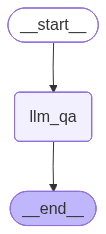

In [15]:
# showing the workflow 
from IPython.display import display, Image
Image(workflow.get_graph().draw_mermaid_png())

In [17]:
# Executing the workflow
initial_state: LLMState = {"input": "What is the capital of France?", "output": None}
final_state = workflow.invoke(initial_state)

In [20]:
print(final_state["output"].content)

The capital of France is **Paris**.
